In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1',periods=7,freq="D")

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


In [11]:
google=pd.read_csv("./stock_data/google.csv")
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [10]:
google.Date=pd.to_datetime(google.Date)
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   JNJ     1762 non-null   float64
 2   JPM     1762 non-null   float64
 3   XOM     1762 non-null   float64
dtypes: float64(3), object(1)
memory usage: 55.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
dtypes: float64(3)
memory usage: 55.1 KB
None


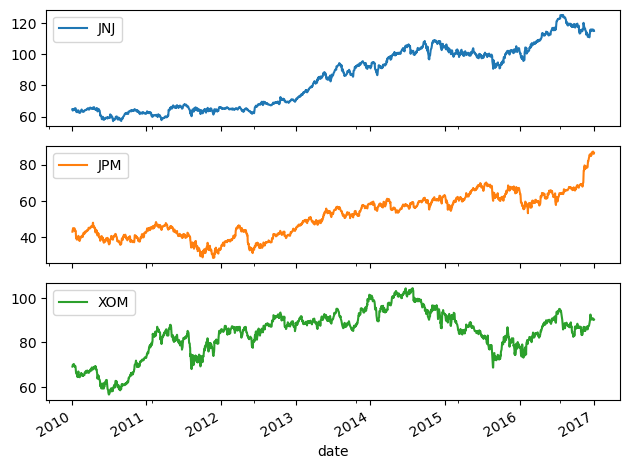

In [16]:
data = pd.read_csv('./stock_data/nyse.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date=pd.to_datetime(data.date)

# Set date column as index
data.set_index("date",inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.tight_layout()
plt.show()



In [40]:
yahoo = pd.read_csv('./stock_data/yahoo.csv')
yahoo.date=pd.to_datetime(yahoo.date)
yahoo.set_index("date",inplace=True)
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


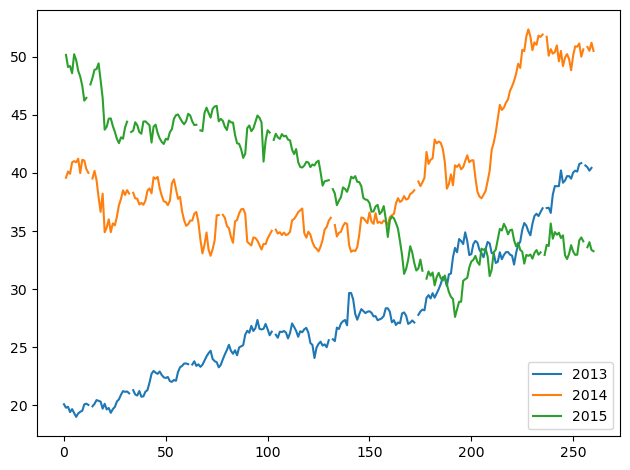

In [42]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ["2013","2014","2015"]:
    price_per_year = yahoo.loc[yahoo.index.year==int(year), ["price"]].reset_index(drop=True)
    price_per_year.rename(columns={"price": year}, inplace=True)#con esta linea cambiamos el nombre de la columna price por el año
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices

prices.plot()
plt.tight_layout()
plt.show()


In [19]:
co = pd.read_csv('./air_quality_data/co_cities.csv',parse_dates=["date"])#parse dates cambia el tipo de dato de dates 
co.set_index("date",inplace=True)
co.asfreq("M").info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-01-31 to 2010-12-31
Freq: M
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      68 non-null     float64
 1   Los Angeles  68 non-null     float64
 2   New York     68 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 123.9 KB
None


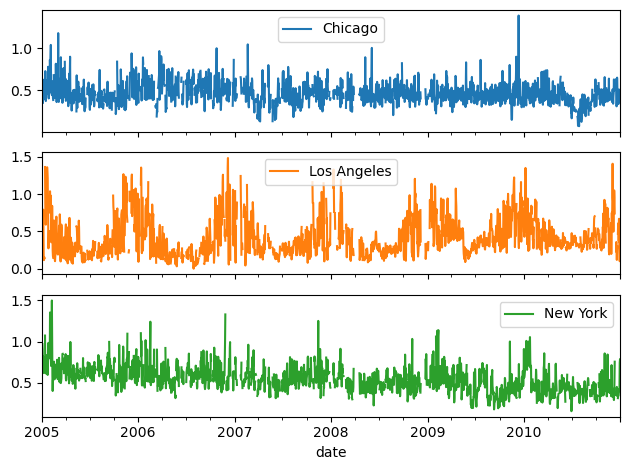

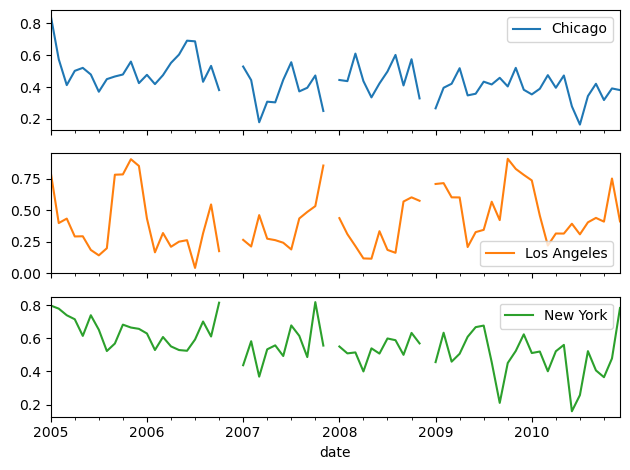

In [20]:
# Inspect data
print(co.info())
# Set the frequency to calendar daily
co = co.asfreq("D")
# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()
# Set frequency to monthly
co = co.asfreq("M")
# Plot the data
co.plot(subplots=True)
plt.tight_layout()
plt.show()

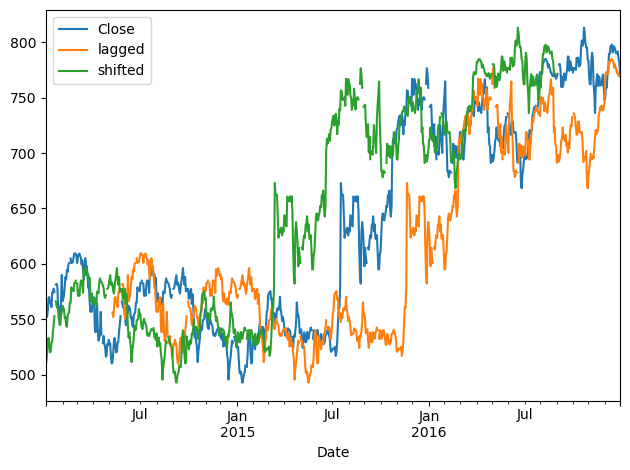

In [25]:
# Import data here
google = pd.read_csv("./stock_data/google.csv",parse_dates=["Date"],index_col="Date")

# Set data frequency to business daily
google = google.asfreq("B")

# Create 'lagged' and 'shifted'
google['lagged'] = google["Close"].shift(periods=90)
google['shifted'] = google["Close"].shift(periods=-90)

# Plot the google price series
google.plot()
plt.tight_layout()
plt.show()
